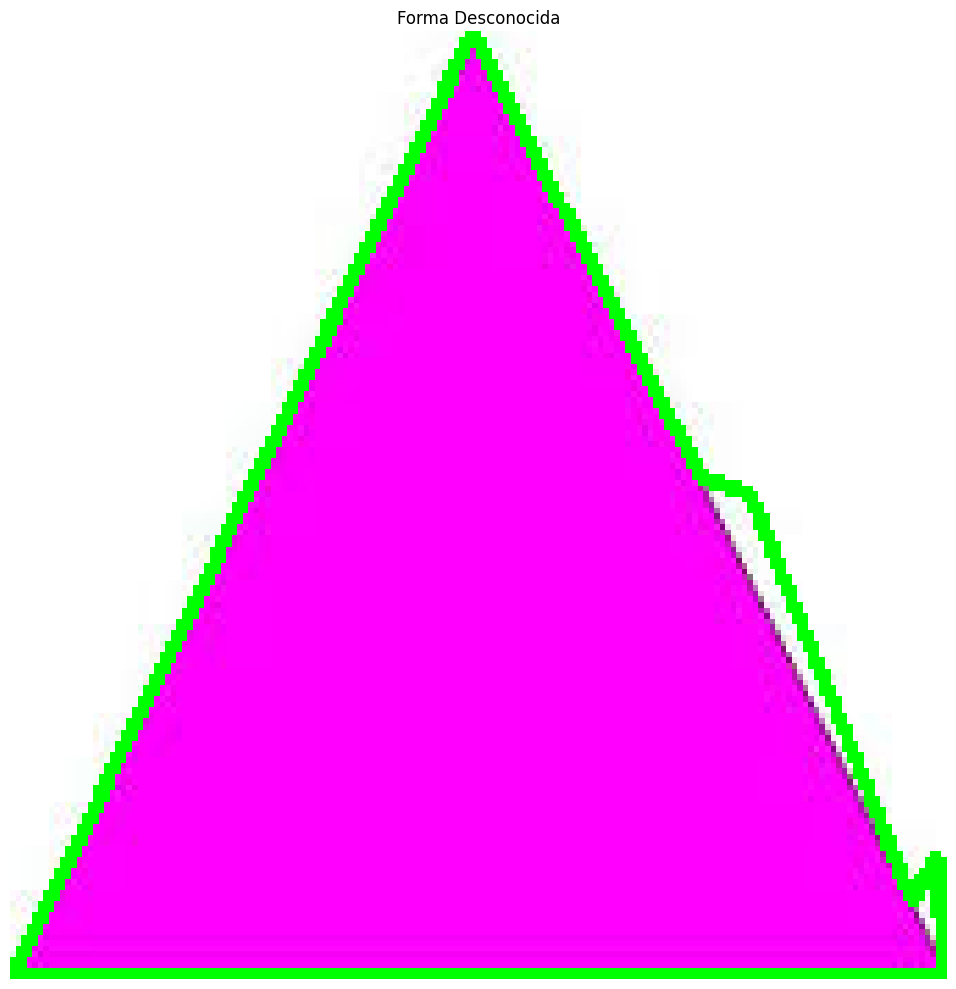

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
image = cv2.imread('mm.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar el filtro Canny
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)

# Encontrar contornos
cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Procesar y etiquetar cada contorno
fig, axs = plt.subplots(len(cnts), 1, figsize=(10, 10*len(cnts)))

if len(cnts) == 1:
    axs = [axs]

for i, c in enumerate(cnts):
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    x, y, w, h = cv2.boundingRect(approx)
    
    # Crear una imagen nueva para mostrar cada forma detectada
    shape_img = image[y:y+h, x:x+w].copy()
    shape_title = 'Forma Desconocida'

    if len(approx) == 3:
        shape_title = 'Triangulo'
    elif len(approx) == 4:
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            shape_title = 'Cuadrado'
        else:
            shape_title = 'Rectangulo'
    elif len(approx) == 5:
        shape_title = 'Pentagono'
    elif len(approx) == 6:
        shape_title = 'Hexagono'
    elif len(approx) > 10:
        shape_title = 'Circulo'

    cv2.drawContours(shape_img, [approx - [x, y]], 0, (0, 255, 0), 2)

    # Convertir la imagen de BGR a RGB para Matplotlib
    shape_img_rgb = cv2.cvtColor(shape_img, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con el título correspondiente
    axs[i].imshow(shape_img_rgb)
    axs[i].set_title(shape_title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def identify_shape(contour):
    # Approximate the contour
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    vertices = len(approx)

    if vertices == 3:
        return "Triángulo"
    elif vertices == 4:
        # Check if it's a square or rectangle
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.95 <= aspect_ratio <= 1.05:
            return "Cuadrado"
        else:
            return "Rectángulo"
    elif vertices == 5:
        return "Pentágono"
    elif vertices == 6:
        return "Hexágono"
    else:
        # Check if it's a circle
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = 4 * np.pi * (area / (perimeter * perimeter))
        if 0.7 <= circularity <= 1.2:
            return "Círculo"
        else:
            return "Forma desconocida"

def process_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Analyze contours
    for contour in contours:
        if cv2.contourArea(contour) < 100:  # Ignore small contours
            continue

        shape = identify_shape(contour)
        # Draw contour and shape name on the image
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(image, shape, (cX - 50, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green color

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example usage
image_path = 'mm.jpg'  # Replace with your image path
process_image(image_path)
